In [134]:
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
data1 = pd.read_csv("person_force_exp_1_trial_1.csv", encoding="latin", header=None, names=["index", "position", "force"])
data_scissors = pd.read_csv("person_scissors_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_forceps = pd.read_csv("person_forceps_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_needle_holder = pd.read_csv("person_needle_holder_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_needle = pd.read_csv("person_needle_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_soft = pd.read_csv("person_soft_exp_1_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
data_hard = pd.read_csv("person_hard_exp_1_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
data_jeni_feedback = pd.read_csv("person_jeni_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
data_jeni = pd.read_csv("person_jeni_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

In [136]:
data_scissors = data_scissors.iloc[1:]
data_forceps = data_forceps.iloc[1:]
data_needle_holder = data_needle_holder.iloc[1:]
data_needle = data_needle.iloc[1:]
data_soft = data_soft.iloc[1:]
data_hard = data_hard.iloc[1:]
data_jeni_feedback = data_jeni_feedback.iloc[1:]
data_jeni = data_jeni.iloc[1:]


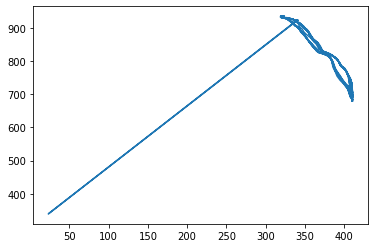

In [137]:
plt.plot(data1["position"], data1["force"])

In [138]:
data1["force"].unique()

array([921., 922., 920., 923., 918., 919., 339., 924.,  nan, 916., 914.,
       912., 905., 902., 895., 887., 880., 869., 855., 836., 827., 822.,
       815., 802., 781., 766., 753., 739., 728., 722., 720., 718., 719.,
       721., 723., 725., 730., 737., 745., 755., 778., 785., 797., 809.,
       818., 824., 829., 844., 866., 876., 885., 892., 898., 900., 904.,
       908., 917., 925., 926., 927., 928., 929., 930., 932., 933., 935.,
       934., 931., 915., 910., 899., 894., 886., 878., 868., 854., 839.,
       826., 821., 803., 767., 742., 714., 691., 685., 679., 680., 681.,
       682., 683., 686., 687., 689., 690., 692., 693., 694., 695., 696.,
       698., 701., 734., 744., 765., 777., 784., 796., 817., 856., 890.,
       901., 911., 906., 896., 870., 841., 825., 787., 769., 756., 743.,
       731., 717., 684., 697., 700., 704., 727., 736., 746., 757., 780.,
       788., 804., 811., 819., 833., 848., 860., 888., 893., 897., 903.,
       913., 881., 872., 859., 816., 807., 791., 77

In [139]:
print(data_forceps)

      position  force
1          441    502
2          441    502
3          441    502
4          441    502
5          441    503
...        ...    ...
4245       440    500
4246       440    501
4247       440    501
4248       440    501
4249       440    500

[4249 rows x 2 columns]


In [140]:
#data_scissors["position"].str.isnumeric()

In [141]:
#data_scissors["position"] = data_scissors.loc[data_scissors["position"].str.isnumeric(), "position"].astype(float)

In [142]:
data_scissors["position"] = (data_scissors["position"] - 162.5) *0.04
data_scissors["force"] = (data_scissors["force"] / 1023)*5

Text(0, 0.5, 'Force')

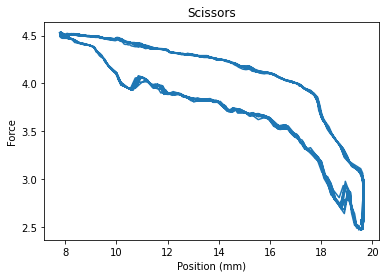

In [143]:
plt.plot(data_scissors["position"], data_scissors["force"])
plt.title("Scissors")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

In [144]:
data_forceps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 1 to 4249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   position  4249 non-null   int64
 1   force     4249 non-null   int64
dtypes: int64(2)
memory usage: 66.5 KB


In [145]:
data_forceps["position"] = (data_forceps["position"] - 137.5) *0.04
data_forceps["force"] = data_forceps["force"]/1023*5

Text(0, 0.5, 'Force')

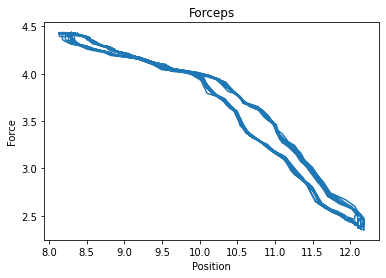

In [146]:
plt.plot(data_forceps["position"], data_forceps["force"])
plt.title("Forceps")
plt.xlabel("Position")
plt.ylabel("Force")

Text(0, 0.5, 'Force')

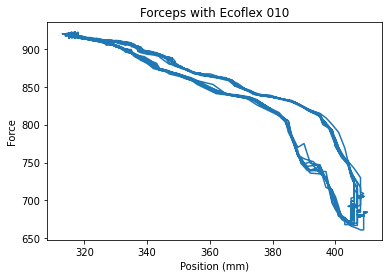

In [133]:
plt.plot(data_soft["position"], data_soft["force"])
plt.title("Forceps with Ecoflex 010")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

Text(0, 0.5, 'Force')

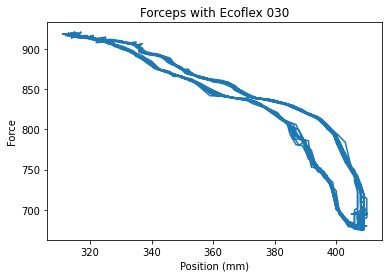

In [76]:
plt.plot(data_hard["position"], data_hard["force"])
plt.title("Forceps with Ecoflex 030")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

In [77]:
data_needle_holder["position"] = (data_needle_holder["position"] - 275) *0.04
data_needle_holder["force"] = (data_needle_holder["force"] / 1023)*5

Text(0, 0.5, 'Force')

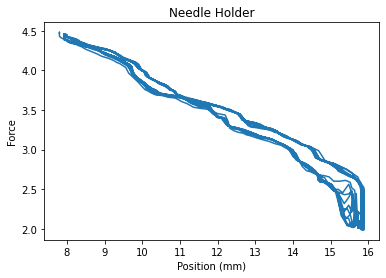

In [78]:
plt.plot(data_needle_holder["position"], data_needle_holder["force"])
plt.title("Needle Holder")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

Text(0, 0.5, 'Force')

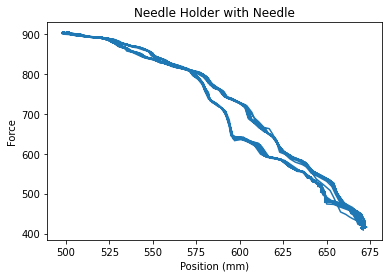

In [34]:
plt.plot(data_needle["position"], data_needle["force"])
plt.title("Needle Holder with Needle")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

In [35]:
data_needle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 1 to 4766
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   position  4766 non-null   int64
 1   force     4766 non-null   int64
dtypes: int64(2)
memory usage: 74.6 KB


In [36]:
data_needle_holder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 1 to 4601
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   position  4601 non-null   float64
 1   force     4601 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 72.0 KB


In [37]:
data_jeni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 1 to 3639
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   position  3639 non-null   int64
 1   force     3639 non-null   int64
dtypes: int64(2)
memory usage: 57.0 KB


Text(0, 0.5, 'Force')

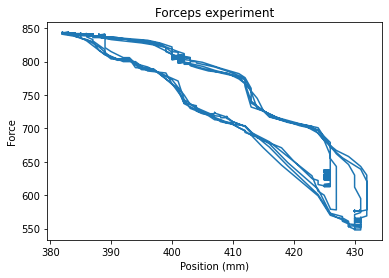

In [38]:
plt.plot(data_jeni_feedback["position"], data_jeni_feedback["force"])
plt.title("Forceps experiment")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

In [41]:
data_jeni["force"] = (data_jeni["force"]/1023) * 5

Text(0, 0.5, 'Force')

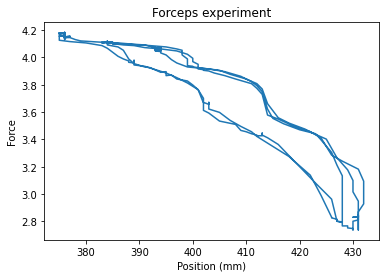

In [42]:
plt.plot(data_jeni["position"], data_jeni["force"])
plt.title("Forceps experiment")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

In [40]:
max(data_jeni["force"])

856

In [148]:
max(data_jeni_feedback["force"])

844